<b><font size="6">|Regression|Perlemoen Age Prediction</font></b>

* **Author**: Dean van Zyl
* **Student ID**: 600367
* **Date:**: 25-April-2025

<b><font size="5">Instructions</font></b>

Carefully read and follow these instructions:

- Enter your personal details in the cell above.
- All practical work must be uploaded to `BC Connect` on the completion of the test/examination, using the following file name convention:
  - **`04.CAS.001_Surname_Firstname_StudentID.ipynb`**. 
  - You **MUST** replace **Surname** with your surname
  - You **MUST** replace **Firstname** with your firstname
  - You **MUST** replace **StudentID** with your student id.
- You must submit this `.ipynb` with the above file name format.
- **Only** submit the single notebook file. No zip files will be accepted.
- Submit on *BC Connect* before the indicated time expires.
- Ensure that **all** cells run before submitting.
- Use the IPython command **display()** (and *not* **print()**) when required to display dataframes.
- The **marks** cells contain the allocated marks for each section. (**DO NOT DELETE OR EDIT THEM!**)

**You must add/insert the necessary code cell after the instruction block with your code.**

<b><font size="5">Problem Formulation</font></b>

A perlemoen farmer has collected data on the physical features and ages of many perlemoen samples over several years. Your company has been contracted to assist the farmer to be able to predict the age of perlemoen  based on their physical features.

The data collected contains the following variables:
  - **Sex:** Perlemoen Sex (M: Male, F: Female, I: Infant)
  - **Length:** Longest Shell measurement (mm)
  - **Diameter:** Diameter - perpendicular to length (mm)
  - **Height:** Height - with meat in shell (mm)
  - **Whole weight:** Weight of whole perlemoen (grams)
  - **Shucked weight:** Weight of meat (grams)
  - **Viscera weight:** Gut weight after bleeding (grams)
  - **Shell weight:** Shell weight - after being dried (grams)
  - **Age:** Age of perlemoen (years)

The dataset is provided in the attached Excel file: **PerlemoenData.xlsx**.

You are required to analyze the data and construct a **Polynomial Regression** model, based on the instructions and requirements below.


In [446]:
marks = 0

# Import Libraries

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Import all required libraries <b>[1 mark]</b></p>

Marks will be deducted for unnecessary libraries.   
    
<b>Insert your code cell after this.</b>
</div>

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [448]:
marks += 1

# Load the Data

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Load the dataset</p>
    
<b>Insert your code cell after this.</b> 
</div>

In [449]:
df = pd.read_excel(r"PerlemoenData.xlsx")


In [450]:
marks += 1

## Data Inspection

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Display the first few rows of the dataframe.</p>
    
<b>Insert your code cell after this.</b>     
</div>

In [451]:
display(df.head())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,91,73,19,102.8,44.9,20.2,30.0,16.6
1,M,70,53,18,45.1,19.9,9.7,14.0,8.3
2,F,106,84,27,135.4,51.3,28.3,42.0,10.3
3,M,88,73,25,103.2,43.1,22.8,31.0,11.4
4,I,66,51,16,41.0,17.9,7.9,11.0,8.2


In [452]:
marks += 1

## Inspect information about the dataframe 

Display all available information about the dataframe.

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Display dataframe information.</p>
    
<b>Insert your code cell after this.</b>
</div>

In [453]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4161 non-null   object 
 1   Length          4161 non-null   int64  
 2   Diameter        4161 non-null   int64  
 3   Height          4161 non-null   int64  
 4   Whole weight    4161 non-null   float64
 5   Shucked weight  4161 non-null   float64
 6   Viscera weight  4161 non-null   float64
 7   Shell weight    4161 non-null   float64
 8   Age             4161 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 292.7+ KB


None

In [454]:
marks += 1

## View the Descriptive Statistics

Extract various descriptive statistics from the dataset, including the mean/standard deviation, mmin, max, etc.

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Display descriptive statistics with statistical parameters as column headings.</p>

Display various descriptive statistics from the dataset, including the mean/standard deviation, mmin, max, etc.
    
Do not use print()  
    
<b>Insert your code cell after this.</b>
</div>

In [455]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Length,4161.0,104.770007,23.936981,26.0,90.0,109.0,123.0,163.0
Diameter,4161.0,81.547705,19.785331,19.0,70.0,85.0,96.0,130.0
Height,4161.0,27.823600,7.672574,0.0,23.0,28.0,33.0,50.0
Whole weight,4161.0,165.397116,97.687809,2.1,88.2,159.8,230.2,565.1
Shucked weight,4161.0,71.785917,44.306790,0.9,37.2,67.1,100.3,297.6
Viscera weight,4161.0,36.064744,21.864200,0.1,18.6,34.0,50.5,152.0
Shell weight,4161.0,47.631411,27.655474,0.7,26.0,46.5,65.3,201.0
Age,4161.0,11.389546,3.126989,3.5,9.4,10.9,12.7,24.4


In [456]:
marks += 1

# Data Preprocessing

## Encoding the Categorical variables

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Identify the categorical variable and replace the variable with suitable numeric values. 
    
Display the first few rows of the dataframe after the encoding.</p>
    
Do <b>not</b> create a new column in the dataframe, but replace the exising feature with the encoded values.
    
<b>Insert your code cell after this.</b>    
</div>

In [457]:
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 0, 'F': 1, 'I': 2})
df_encoded.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,91,73,19,102.8,44.9,20.2,30.0,16.6
1,0,70,53,18,45.1,19.9,9.7,14.0,8.3
2,1,106,84,27,135.4,51.3,28.3,42.0,10.3
3,0,88,73,25,103.2,43.1,22.8,31.0,11.4
4,2,66,51,16,41.0,17.9,7.9,11.0,8.2


In [458]:
marks += 3

## Define Features & Output Variable

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Define the output variable name and construct a list of the names of the features.
    
- The output variable <b>must</b> be a string.    
- The features <b>must</b> be a list of strings.

Print the list of features in the problem.
    
<b>Insert your code cell after this.</b></p>    
</div>

In [459]:
xn = df_encoded.drop(columns='Age').columns.tolist()
yn = 'Age'

print(xn)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [460]:
marks += 2

# Exploratory Data Analysis

## Box Plot of Features

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Show a <b>single</b> box plot of the <b>features</b> in the dataset.

<b>Insert your code cell after this.</b>
</p>
</div>

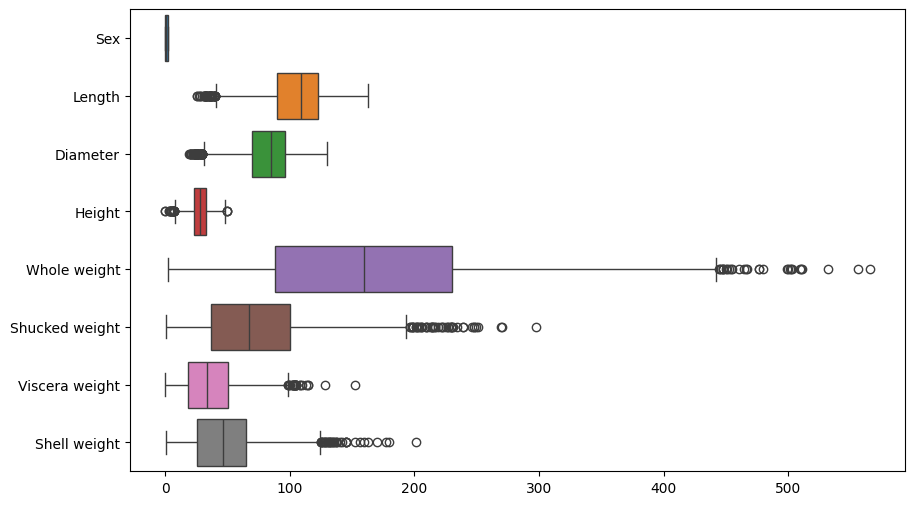

In [461]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded[xn], orient='h')
# plt.tight_layout()
plt.show()

In [462]:
marks += 1

**Note:** You may ignore any possible outliers.

## Histogram Plots of Data

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create histogram plots of all the <b>features</b> in the data.</p>
    
<b>Insert your code cell after this.</b>
</div>

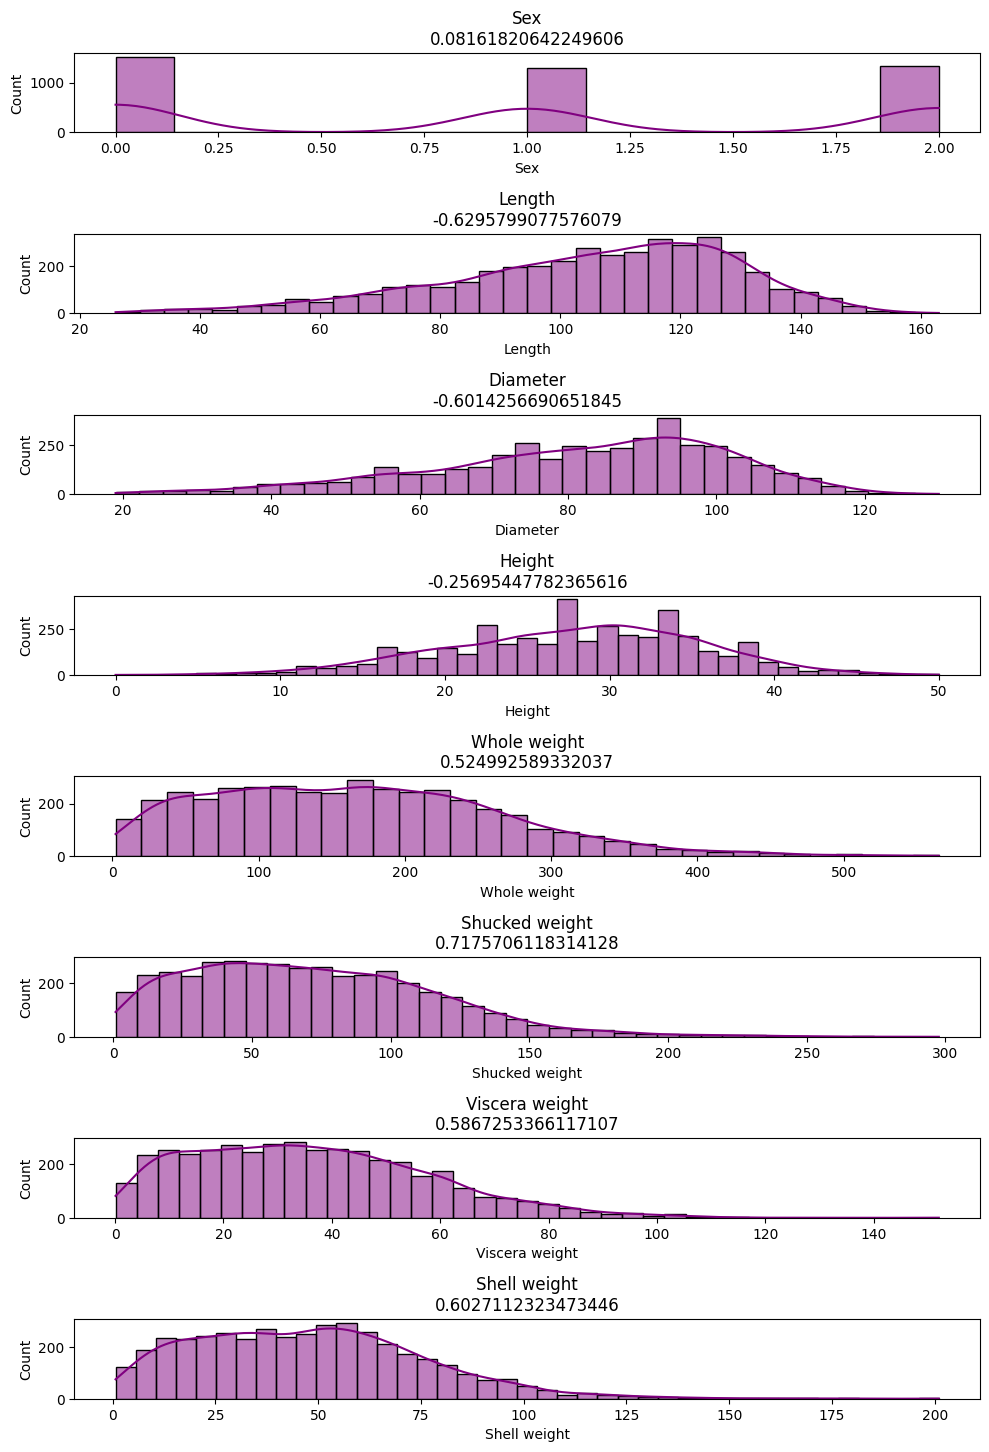

In [463]:
plt.figure(figsize=(10, 16))
for i, col in enumerate(df_encoded[x].columns):
    skew_val = df_encoded[col].skew()
    plt.subplot(len(df_encoded.columns), 1, i + 1)
    sns.histplot(df_encoded[col], kde=True, color='purple')
    plt.title(f"{col}\n{skew_val}")
plt.tight_layout()
plt.show()

In [464]:
marks += 3

**Hint:** Pay attention to the number of features within subplot. Maybe use a 4 by 2 size grid.

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create a histogram plot of the <b>output variable</b>.</p>
    
<b>Insert your code cell after this.</b>
</div>

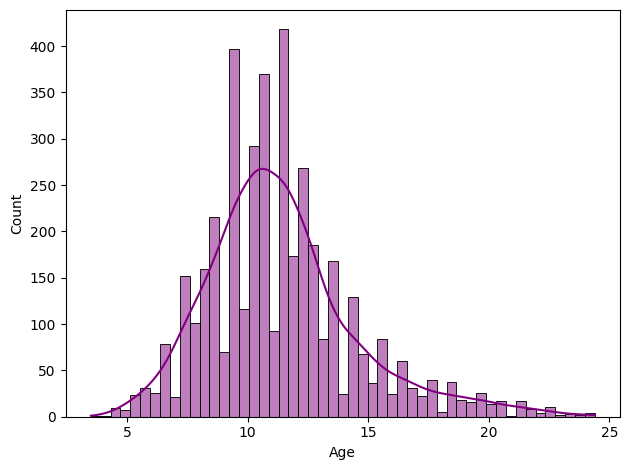

In [465]:
# plt.figure(figsize=(10, 8))
sns.histplot(df_encoded[yn], kde=True, color='purple')
plt.tight_layout()
plt.show()

In [466]:
marks += 2

## Correlation Analysis

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Display the correlation matrix of the dataset.</p>
    
<b>Note: You must not display a heatmap.</b>    
    
<b>Insert your code cell after this.</b>    
</div>

In [467]:
display(df_encoded.corr())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.447904,-0.457363,-0.451297,-0.461130,-0.440453,-0.454331,-0.445663,-0.355529
Length,-0.447904,1.000000,0.986735,0.899513,0.926190,0.898674,0.903633,0.899829,0.560592
Diameter,-0.457363,0.986735,1.000000,0.905769,0.926168,0.893712,0.900196,0.907284,0.578425
Height,-0.451297,0.899513,0.905769,1.000000,0.887968,0.836839,0.866464,0.889608,0.612435
Whole weight,-0.461130,0.926190,0.926168,0.887968,1.000000,0.969887,0.966486,0.955864,0.540696
Shucked weight,-0.440453,0.898674,0.893712,0.836839,0.969887,1.000000,0.931793,0.884507,0.424541
Viscera weight,-0.454331,0.903633,0.900196,0.866464,0.966486,0.931793,1.000000,0.909099,0.508050
Shell weight,-0.445663,0.899829,0.907284,0.889608,0.955864,0.884507,0.909099,1.000000,0.625062
Age,-0.355529,0.560592,0.578425,0.612435,0.540696,0.424541,0.508050,0.625062,1.000000


In [468]:
marks += 1

**Note:** You must **not** display a heatmap.

# Regression Model

## Construct input & output variables

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create dataframe variables for the inputs (X) and the output (y).

Display the two dataframes. 
    
**Hint:** You should not need to type in any variable names.    
    
<b>Insert your code cell after this.</b>
</p>
</div>

In [469]:
X = df_encoded[xn]
y = df_encoded[yn]

display(X.head())
display(y.head())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,91,73,19,102.8,44.9,20.2,30.0
1,0,70,53,18,45.1,19.9,9.7,14.0
2,1,106,84,27,135.4,51.3,28.3,42.0
3,0,88,73,25,103.2,43.1,22.8,31.0
4,2,66,51,16,41.0,17.9,7.9,11.0


0    16.6
1     8.3
2    10.3
3    11.4
4     8.2
Name: Age, dtype: float64

In [470]:
marks += 2

## Construct training and test data

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Split the variables into training and test data.</p>

**Note:** You **must** use the following parameters when splitting the data:
 - test_size = 0.2 
 - random_state = 55  
    
<b>Insert your code cell after this.</b>
</div>

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [472]:
marks += 1

## Regression Model

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Construct the polynomial features for the <b>test</b> and <b>training</b> data.

You <b>must</b> use a <b>cubic polynomial.</b>

<b>Insert your code cell after this.</b>    
</p>
</div>

In [473]:
# df_encoded.head(50)

In [474]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [475]:
marks += 3

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Construct and train a Regression model using the <b>training data </b>.  
    
**Note:** You **must** use the following parameters when creating the model:
 - kernel='rbf'
 - C = 100.0    

<b>Insert your code cell after this.</b>    
</p>
</div>

In [476]:
model = LinearRegression()
# model = LinearRegression(kernel='rbf', C=100.0)
model.fit(X_train_poly, y_train)

LinearRegression()

In [477]:
marks += 1

# Model Evaluation

## Predictions on Training & Test Data

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Calculate the predictions from the model using the testing and test data.

<b>Insert your code cell after this.</b>    
</p>
</div>

In [478]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [479]:
marks += 2

## Evaluation of Training Predictions

### Comparing Training Data Predictions

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create a scatter plot of the Training Data against the Predictions of the training Data.

Include a line showing the ideal case.    
    
<b>Insert your code cell after this.</b>        
</p>
</div>

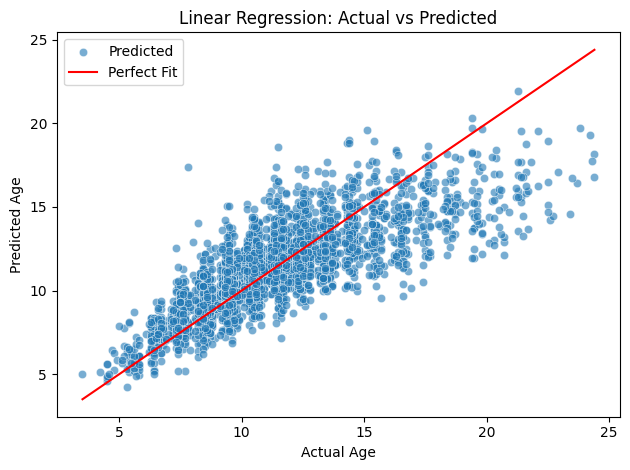

In [480]:
# plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train, y=y_train_pred, label='Predicted', alpha=0.6)
sns.lineplot(x=y_train, y=y_train, color='red', label='Perfect Fit')  # Ideal case: y = x
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.legend()
plt.tight_layout()
plt.show()

In [481]:
marks += 2

### Training Data Metrics

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Calculate and print the RMSE metric to evaluate the performance of the training predictions.

Round the RMSE to <b>3 decimal places</b>.
    
<b>Insert your code cell after this.</b>        
</p>
</div>

In [482]:
train_mse =  mean_squared_error(y_train, y_train_pred)
train_rmse =  np.round(np.sqrt(train_mse),3)
print(train_rmse)

1.929


In [483]:
marks += 2

## Evaluation of Testing Predictions

### Comparing Testing Data Predictions

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create a scatter plot of the Testing Data against the Predictions of the test Data.

Include a line showing the ideal case.    
    
<b>Insert your code cell after this.</b>
</p>
</div>

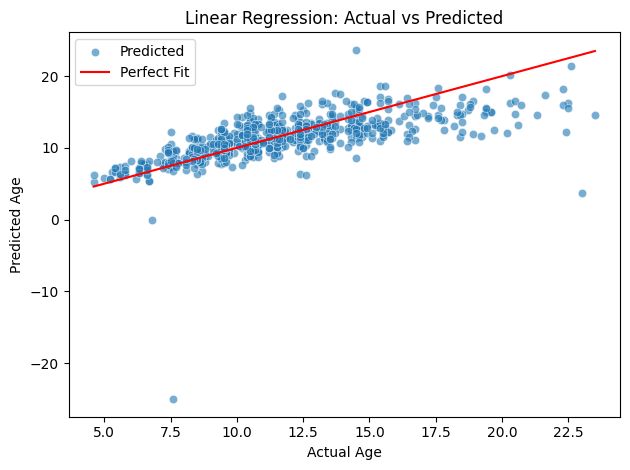

In [484]:
sns.scatterplot(x=y_test, y=y_test_pred, label='Predicted', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') 
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.legend()
plt.tight_layout()
plt.show()

In [485]:
marks += 2

### Testing Data Metrics

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Calculate and print the RMSE metric to evaluate the performance of the testing predictions.

Round the RMSE to <b>3 decimal places</b>.
    
<b>Insert your code cell after this.</b>    
</p>
</div>

In [486]:
test_mse =  mean_squared_error(y_test, y_test_pred)
test_rmse =  np.round(np.sqrt(test_mse),3)
print(test_rmse)

2.436


In [487]:
marks += 2

## Prediction for specific case

In [488]:
X_point = {"Sex"             : 1,
           "Length"          : 102,
           "Diameter"        : 78,
           "Height"          : 25, 
           "Whole weight"    : 126.1,
           "Shucked weight"  : 46.1, 
           "Viscera weight"  : 35.2, 
           "Shell weight"    : 36.7 
          }

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Predict the perlemoen age for the feature parameter values given in the X_point dictionary. Print the perlemoen age prediction, rounded off to 1-decimal place.
    
<b>Hint:</b> Remember the polynomial features!

<b>Insert your code cell after this.</b>
</p>
</div>

In [489]:
df_input = pd.DataFrame(X_point, index=[0])
poly_input = poly.transform(df_input)
print(f"Predicted Age: {model.predict(poly_input)[0].round(1)}")

Predicted Age: 12.1


In [490]:
marks += 3

<b><font size="5">Total Marks:</font></b>

In [491]:
print(f"Total Marks = {marks} / 37")

Total Marks = 37 / 37
